<a href="https://colab.research.google.com/github/JulianoMata/Geracao-Tech-Unimed-BH-Ciencia-de-Dados/blob/main/Notebooks/Introducao_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=40C000>Trabalhando com Planilhas do Excel</font>

In [1]:
# Importando a biblioteca Pandas
import pandas as pd

In [2]:
# Existem algumas maneiras de importar arquivos. Método 'files' foi o escolhido.
from google.colab import files
arquivos = files.upload()

Saving Aracaju.xlsx to Aracaju.xlsx
Saving Fortaleza.xlsx to Fortaleza.xlsx
Saving Natal.xlsx to Natal.xlsx
Saving Recife.xlsx to Recife.xlsx
Saving Salvador.xlsx to Salvador.xlsx


In [3]:
# Leitura dos arquivos
# Vale ressaltar que na realidade da análise de dados e machine learning são 
# poucas as situações onde utilizamos a função acima. Isto acontece pois 
# planilhas normais do Excel não são ideais para grandes conjuntos de dados. 
# Elas possuem diferentes possibilidades de formatação, que podem complicar 
# nosso código, dentre outros problemas.
import io
df1 = pd.read_excel(io.BytesIO(arquivos['Aracaju.xlsx']))
df2 = pd.read_excel(io.BytesIO(arquivos['Fortaleza.xlsx']))
df3 = pd.read_excel(io.BytesIO(arquivos['Natal.xlsx']))
df4 = pd.read_excel(io.BytesIO(arquivos['Recife.xlsx']))
df5 = pd.read_excel(io.BytesIO(arquivos['Salvador.xlsx']))

In [4]:
# Concatenando os arquivos
df_principal = pd.concat([df1, df2, df3, df4, df5])

In [5]:
# Exibindo as 5 primeiras linhas
df_principal.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
# Exibindo as 5 últimas linhas
df_principal.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
# Busca dados de forma aleatório no Dataframe
df_principal.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
47,Recife,2019-01-01,8.60,983,3
76,Aracaju,2018-01-01,33.51,1523,4
101,Fortaleza,2019-01-01,11.67,1005,4
108,Salvador,2019-03-02,11.72,1037,1
191,Natal,2019-01-02,173.59,1034,2


In [8]:
# Verificando o tipo de dados de cada coluna
df_principal.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
# Alterando o tipo de dados da coluna LojaID
df_principal["LojaID"] = df_principal["LojaID"].astype("object")

In [10]:
df_principal.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df_principal.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


## <font color=40C000>Tratando valores faltantes</font>

In [12]:
#Consultando linhas com valores faltantes
df_principal.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
# Substituindo os valores nulos pela média
df_principal["Vendas"].fillna(df_principal["Vendas"].mean(), inplace = True)

In [14]:
df_principal["Vendas"].mean()

122.61180089485458

In [15]:
df_principal.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
# Substituindo valores nulos por 'zero'
df_principal["Vendas"].fillna(0, inplace=True)

In [17]:
# Apagando as linhas com valores nulos
df_principal.dropna(inplace = True)

In [18]:
# Apagando as linhas com valores nulos com base apenas em '1 coluna'
df_principal.dropna(subset = ["Vendas"], inplace = True)

In [19]:
# Apagando as linhas com valores nulos
df_principal.dropna(how = "all", inplace = True)

In [20]:
# Quantidade de linhas e colunas
df_principal.shape

(894, 5)

## <font color=40C000>Criando novas colunas</font>

In [21]:
# Criando a coluna de receita
# Pode utilizar o sinal de multiplicação(*)
df_principal["Receita"] = df_principal["Vendas"].mul(df_principal["Qtde"])
df_principal.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
# Elimina coluna Qtde
# df_principal.drop(["Qtde"], axis=1, inplace = True)
# df_principal.head()

In [23]:
# Não havendo a coluna 'Qtde' e sim a coluna 'Receita'
df_principal["Receita/Vendas"] = df_principal["Receita"] / df_principal["Vendas"]
df_principal.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [24]:
# Retornando a maior receita
df_principal["Receita"].max()

3544.0

In [25]:
# Retornando a menor receita
df_principal["Receita"].min()

3.34

In [26]:
# Top 3 melhores com base na coluna 'Receita' (nlargest)
df_principal.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [27]:
# Top 3 piores com base na coluna 'Receita' (nsmallest)
df_principal.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [28]:
# Agrupamento por cidade
df_agrupamento_cidade = pd.DataFrame(df_principal.groupby("Cidade")["Receita"].sum()).reset_index()
df_agrupamento_cidade

,Cidade,Receita
0,Aracaju,48748.25
1,Fortaleza,37913.97
2,Natal,167227.52
3,Recife,51936.51
4,Salvador,40596.73


In [29]:
# Ordenando o conjunto de dados
df_principal.sort_values("Receita", ascending = False).head(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## <font color=40C000>Trabalhando com Datas</font>

In [30]:
# Transformando a coluna de data em tipo inteiro
# Ao invés de usar '.astype' usei '.view' para evitar mensagem de erro sobre descontinuação
df_principal["Data"] = df_principal["Data"].view("int64")

In [31]:
# Verificando o tipo de dados de cada coluna
df_principal.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [32]:
# Transformando coluna de 'Data' em datas
df_principal["Data"] = pd.to_datetime(df_principal["Data"])

In [33]:
df_principal.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [34]:
# Agrupando por 'ano'
df_principal.groupby(df_principal["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [35]:
# Criando uma nova coluna com o ano
df_principal["Ano_Venda"] = df_principal["Data"].dt.year

In [36]:
df_principal.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
73,Aracaju,2018-01-01,159.78,1521,3,479.34,3.0,2018
187,Natal,2019-01-02,3.85,1035,3,11.55,3.0,2019
21,Recife,2019-01-01,164.74,983,1,164.74,1.0,2019
38,Aracaju,2018-01-01,142.46,1520,1,142.46,1.0,2018
93,Aracaju,2018-01-01,188.70,1523,1,188.70,1.0,2018


In [37]:
# Extraindo o 'mês' e o 'dia'
df_principal["Mes_Venda"], df_principal["Dia_Venda"] = (df_principal["Data"].dt.month, df_principal["Data"].dt.day)

In [38]:
df_principal.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
92,Recife,2019-01-01,163.02,981,4,652.08,4.0,2019,1,1
22,Fortaleza,2019-01-01,150.32,1005,1,150.32,1.0,2019,1,1
80,Aracaju,2018-01-01,121.77,1523,3,365.31,3.0,2018,1,1
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,6.0,2019,1,1
143,Salvador,2019-01-02,41.18,1037,2,82.36,2.0,2019,1,2


In [39]:
# Retornando a data mais antiga
df_principal["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [40]:
# Calculando a diferença dos dias
# Não havendo duas colunas de datas foi utilizado a data mínima como exemplo
df_principal["Diferenca_Dias"] = df_principal["Data"] - df_principal["Data"].min()
df_principal.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days
95,Fortaleza,2019-01-01,35.28,1002,2,70.56,2.0,2019,1,1,365 days
67,Salvador,2019-01-01,36.89,1037,2,73.78,2.0,2019,1,1,365 days
27,Aracaju,2018-01-01,3.39,1523,4,13.56,4.0,2018,1,1,0 days


In [41]:
# Criando coluna 'Trimestre'
df_principal["Trimestre_Venda"] = df_principal["Data"].dt.quarter

In [42]:
df_principal.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
126,Fortaleza,2019-03-02,41.87,980,8,334.96,8.0,2019,3,2,425 days,1
12,Recife,2019-01-01,17.48,982,2,34.96,2.0,2019,1,1,365 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,4.0,2019,3,24,447 days,1
217,Natal,2019-01-02,37.65,1036,2,75.30,2.0,2019,1,2,366 days,1
178,Natal,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2,366 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
20,Salvador,2019-01-01,33.97,1034,3,101.91,3.0,2019,1,1,365 days,1
200,Natal,2019-01-02,41.06,1035,1,41.06,1.0,2019,1,2,366 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2.0,2019,3,31,454 days,1


In [43]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df_principal.loc[(df_principal["Data"].dt.year == 2019) & (df_principal["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


## <font color=40C000>Visualização de dados</font>

In [44]:
# Importação bilblioteca
import matplotlib.pyplot as plt

In [45]:
# Quantidade de vendas por loja
df_principal["LojaID"].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

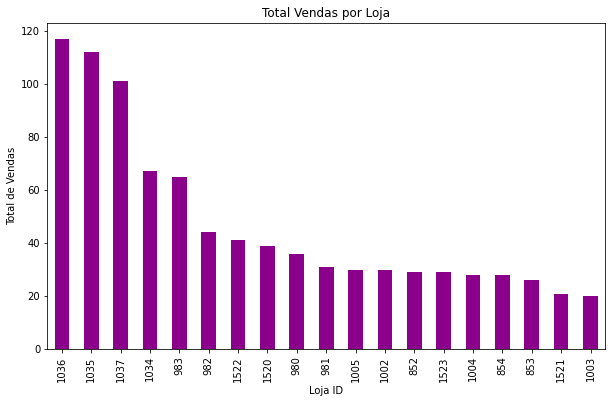

In [46]:
# Gráfico de barras
# O uso do ';' é para não aparecer a linha acima do gráfico
df_principal["LojaID"].value_counts(ascending = False).plot.bar(color = "darkmagenta", figsize=(10, 6))
plt.title("Total Vendas por Loja")
plt.xlabel("Loja ID")
plt.ylabel("Total de Vendas");

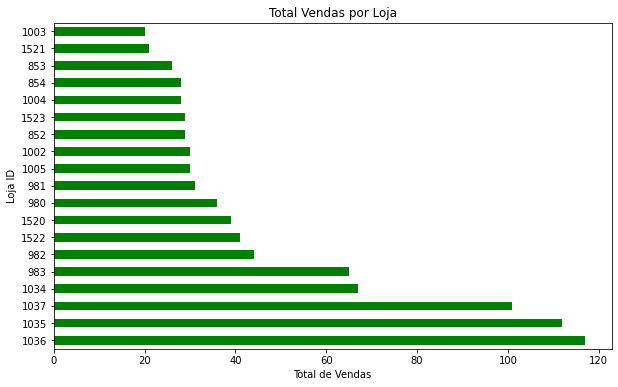

In [47]:
# Gráfico de barras horizontais
df_principal["LojaID"].value_counts().plot.barh(color = "green", figsize=(10, 6))
plt.title("Total Vendas por Loja")
plt.xlabel("Total de Vendas")
plt.ylabel("Loja ID");

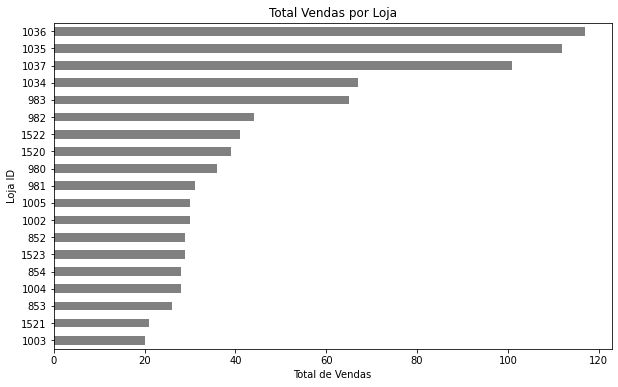

In [48]:
# Gráfico de barras horizontais
df_principal["LojaID"].value_counts(ascending = True).plot.barh(color = "gray", figsize=(10, 6))
plt.title("Total Vendas por Loja")
plt.xlabel("Total de Vendas")
plt.ylabel("Loja ID");

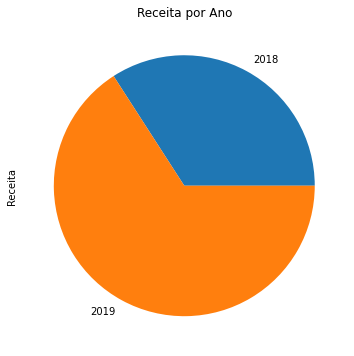

In [49]:
# Gráfico de Pizza
df_principal.groupby(df_principal["Data"].dt.year)["Receita"].sum().plot.pie(figsize=(10, 6))
plt.title("Receita por Ano");

In [50]:
# Total vendas por cidade
df_principal["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

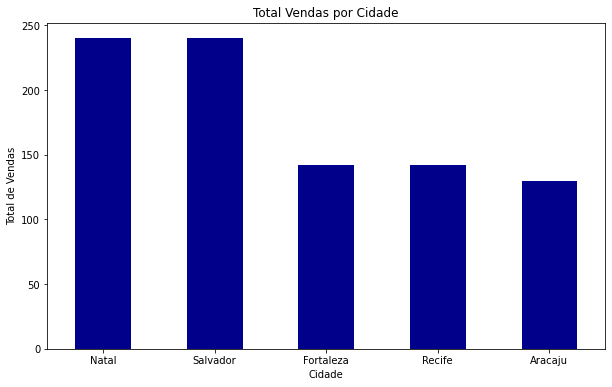

In [51]:
# Adicionando um 'título' e alterando nome dos eixos
df_principal["Cidade"].value_counts().plot.bar(color = "darkblue", figsize=(10, 6))
plt.title("Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")
plt.xticks(rotation = "horizontal");

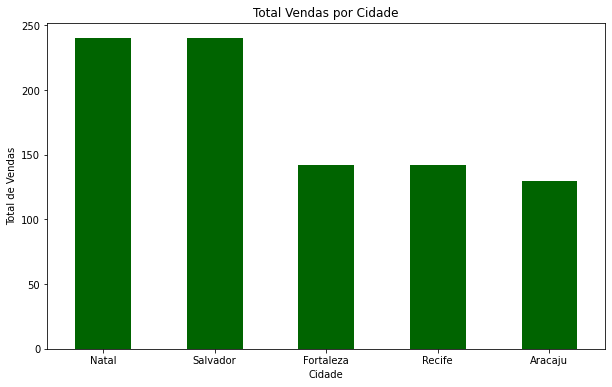

In [52]:
# Alterando a cor
df_principal["Cidade"].value_counts().plot.bar(color = "darkgreen", figsize=(10, 6))
plt.title("Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")
plt.xticks(rotation = "horizontal");

In [53]:
# Alterando o estilo
# Documentação - 'https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html'
plt.style.use("ggplot")

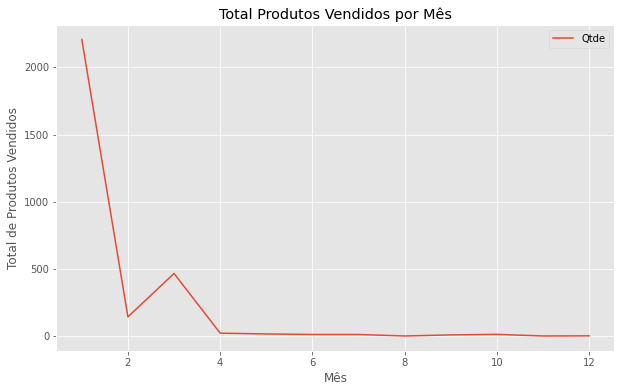

In [54]:
df_principal.groupby(df_principal["Mes_Venda"])["Qtde"].sum().plot(figsize=(10, 6))
plt.title("Total Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend();

In [55]:
df_principal.groupby(df_principal["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [56]:
# Selecionando as vendas de 2019
df_2019 = df_principal[df_principal["Ano_Venda"] == 2019]
df_2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days,1


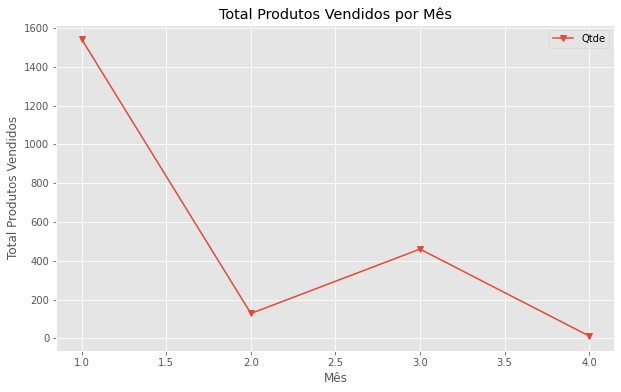

In [57]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(figsize = (10, 6), marker = "v")
plt.title("Total Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

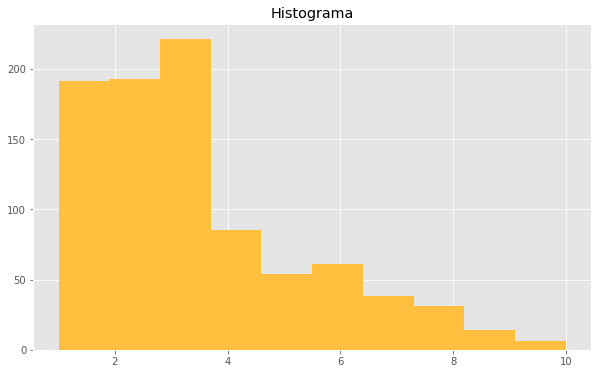

In [58]:
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(df_principal["Qtde"], color = "#FFC040")
plt.title("Histograma");

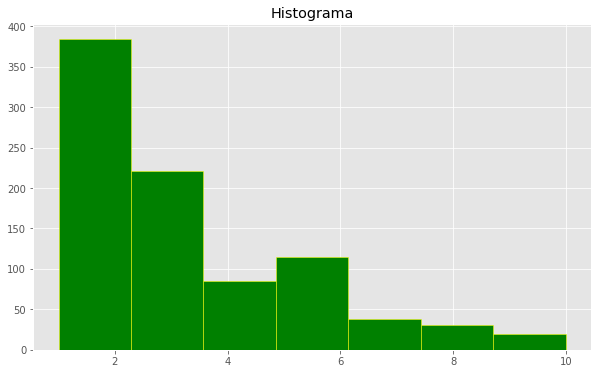

In [59]:
# Histograma 
plt.figure(figsize=(10, 6))
plt.hist(df_principal["Qtde"], bins=7, edgecolor="yellow", color="green")
plt.title("Histograma");

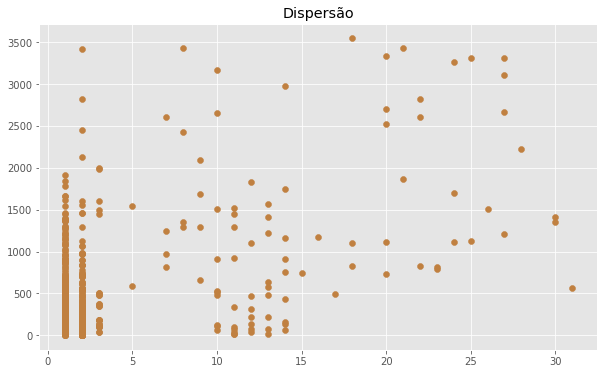

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(x = df_principal["Dia_Venda"], y = df_principal["Receita"], color = "#C08040")
plt.title("Dispersão");

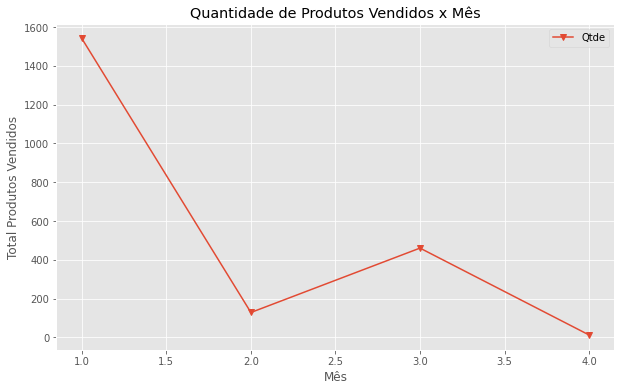

In [61]:
# Salvando em 'png'
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(figsize = (10, 6), marker = "v")
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico_qtde_x_mes.png");